In [1]:
import numpy
import sklearn
import survwrap

In [2]:
X, y = survwrap.load_test_data('flchain')
X.shape, y.shape

((7874, 44), (7874,))

In [ ]:
def load_test_data(dataset='breast_cancer'):
    "Load standard dataset for testing"

    #X, y = sksurv.datasets.load_breast_cancer()
    X, y = getattr(sksurv.datasets, 'load_' + dataset)()
    X = numpy.concatenate(
        [
            X.select_dtypes("float"),
            sklearn.preprocessing.OneHotEncoder(sparse_output=False).fit_transform(
                X.select_dtypes("category")
            ),
        ],
        axis=1,
    )
    #X = sklearn.impute.SimpleImputer(strategy='median').fit_transform(X)

    return X, y

In [7]:
import sklearn.impute

In [8]:
sklearn.impute.SimpleImputer(strategy='median').fit_transform(X)

array([[97.  ,  1.7 ,  5.7 , ...,  0.  ,  1.  ,  0.  ],
       [92.  ,  0.9 ,  0.87, ...,  0.  ,  1.  ,  0.  ],
       [94.  ,  1.4 ,  4.36, ...,  0.  ,  1.  ,  0.  ],
       ...,
       [54.  ,  1.  ,  1.7 , ...,  0.  ,  1.  ,  0.  ],
       [53.  ,  1.  ,  1.71, ...,  0.  ,  1.  ,  0.  ],
       [50.  ,  0.7 ,  1.19, ...,  0.  ,  1.  ,  0.  ]])

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)

# test coxnet

In [ ]:
coxnet = survwrap.CoxNet()

In [ ]:
coxnet.fit(X_train, y_train)

ValueError: Input X contains NaN.

In [ ]:
import sksurv

In [ ]:
X, y = sksurv.datasets.load_flchain()
X

,age,chapter,creatinine,flc.grp,kappa,lambda,mgus,sample.yr,sex
0,97.0,Circulatory,1.7,10,5.700,4.860,no,1997,F
1,92.0,Neoplasms,0.9,1,0.870,0.683,no,2000,F
2,94.0,Circulatory,1.4,10,4.360,3.850,no,1997,F
3,92.0,Circulatory,1.0,9,2.420,2.220,no,1996,F
4,93.0,Circulatory,1.1,6,1.320,1.690,no,1996,F
...,...,...,...,...,...,...,...,...,...
7869,52.0,NaN,1.0,6,1.210,1.610,no,1995,F
7870,52.0,NaN,0.8,1,0.858,0.581,no,1999,F
7871,54.0,NaN,NaN,8,1.700,1.720,no,2002,F
7872,53.0,NaN,NaN,9,1.710,2.690,no,1995,F


In [ ]:
X = numpy.concatenate(
    [
        X.select_dtypes("float"),
        OneHotEncoder(sparse_output=False).fit_transform(
            X.select_dtypes("category")
        ),
    ],
    axis=1,
)


NameError: name 'OneHotEncoder' is not defined

In [ ]:
X['chapter']

In [ ]:
X.isnull().mean()

age           0.000000
chapter       0.724536
creatinine    0.171450
flc.grp       0.000000
kappa         0.000000
lambda        0.000000
mgus          0.000000
sample.yr     0.000000
sex           0.000000
dtype: float64

In [ ]:
coxnet = survwrap.CoxNet()

In [ ]:
coxnet.get_parameter_grid()

{'l1_ratio': [0.01, 0.1, 0.2, 0.5, 0.8, 0.9, 0.99]}

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
def optimize(estimator, X, y, mode='sklearn-grid'):
    if mode == 'sklearn-grid':
        gs = GridSearchCV(estimator, estimator.get_parameter_grid(), refit=True)
        gs.fit(X, y)
        return gs.best_estimator_, gs.best_params_
    raise ValueError(f'unknown mode parameter: "{mode}"')

In [ ]:
cn_gs.fit(X, y)

/DataSets/gb_projects/survwrap/survwrap/sksurv_adapters.py:30: ConvergenceWarning: Optimization terminated early, you might want to increase the number of iterations (max_iter=100000).
  self.model_ = self.model_.fit(X, y)


GridSearchCV(estimator=CoxNet(),
             param_grid={'l1_ratio': [0.01, 0.1, 0.2, 0.5, 0.8, 0.9, 0.99]})

In [ ]:
cn_gs.best_params_

{'l1_ratio': 0.01}

In [ ]:
y_cox = coxnet.predict(X)
y_cox.shape, y_cox.dtype

((198,), dtype('float64'))

In [ ]:
y[y.dtype.names[0]].dtype

dtype('bool')

## Test C-index

In [ ]:
from sksurv.metrics import concordance_index_censored

In [ ]:
concordance_index_censored(y[y.dtype.names[0]], y[y.dtype.names[1]],y_cox)

(0.9462189117535664, 7495, 426, 0, 0)

## test pycox

In [ ]:
dhs = tosa.DeepHitSingle(learning_rate=0.05, epochs=100, batch_size=len(y)//2, rng_seed = 2307)

In [ ]:
dhs.fit(X,y)

/usr/local/ivan/Unito/conda/envs/survwrap-pycox/lib/python3.10/site-packages/torchtuples/callbacks.py:607: UserWarning: This overload of add is deprecated:
	add(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add(Tensor other, *, Number alpha) (Triggered internally at  /croot/pytorch_1675190298929/work/torch/csrc/utils/python_arg_parser.cpp:1174.)
  p.data = p.data.add(-weight_decay * eta, p.data)


DeepHitSingle(rng_seed=2307, num_durations=10, layer_sizes=[10, 10], epochs=100, batch_size=99, learning_rate=0.05, device='cpu')

In [ ]:
dhs.model_

<AxesSubplot:>

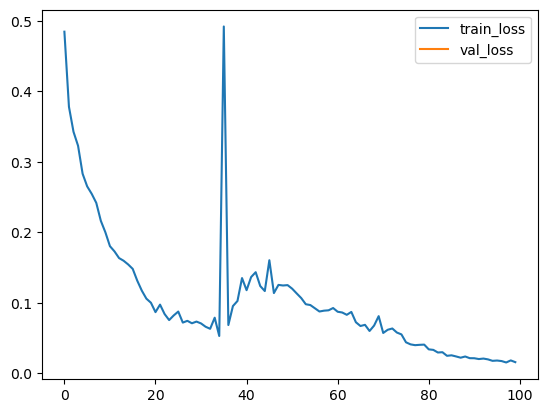

In [ ]:
dhs.training_log_.plot()

In [ ]:
y_dhs = dhs.predict(X)

In [ ]:
y_dhs.shape, y_dhs.dtype


((198,), dtype('float64'))

In [ ]:
assert( y_cox.shape == y_dhs.shape)

In [ ]:
concordance_index_censored(event_indicator = tosa.get_indicator(y), 
                           event_time = tosa.get_time(y),
                           estimate = y_dhs)

(0.9570761267516728, 7581, 340, 0, 0)

In [ ]:
type(y)


numpy.ndarray

In [ ]:
dhs.harrell_score(y,y_dhs)


(0.9570761267516728, 7581, 340, 0, 0)

In [ ]:
dhs.score(X,y)

0.9570761267516728

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_score = cross_val_score(dhs, X, y, cv=3)

In [ ]:
cv_score.mean(), cv_score.std() 

(0.5857537661321218, 0.07976650002190927)

In [ ]:
cv_score

array([0.53268293, 0.52608213, 0.69849624])